This is the project of Statistical foundation of machine learning course at Vrije Universiteit Brussels. Team members:

* Name: **MirBagher Hosseini** <br>
 Student number: 0597082  <br>
 FACULTY OF SCIENCES AND BIOENGINEERING SCIENCES, Master of Science in Applied Sciences and Engineering: Computer Science, Artificial Intelligence.

* Name: **Kimia Khaki** <br>
Student number: 0595858  <br>
FACULTY OF SCIENCES AND BIOENGINEERING SCIENCES, Master of Science in Applied Sciences and Engineering: Computer Science, Artificial Intelligence.

# The chosen questions:

### 1.What is the comparative performance of ensemble methods (Random Forest and XGBoost) versus single models (Logistic Regression, Linear Regression, and Support Vector Machines) across a diverse range of datasets?
### 2.What is the importance of data scaling in machine learning? How does it impact the performance of different algorithms?
### 3.What is overfitting in machine learning? How can it be prevented? What are the different regularization techniques used in machine learning, and which one is considered better?

# Importing the required libraries

In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.model_selection import cross_val_score

#For classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# For Regression

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics

# for teh second question
from sklearn.datasets import load_wine

# For third question
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from numpy import genfromtxt




# 1. Question one

**What is the comparative performance of ensemble methods (Random Forest and XGBoost) versus single models (Logistic Regression, Linear Regression, and Support Vector Machines) across a diverse range of datasets?**

## 1.1 Introduction
 The aim of this Question is to investigate the comparative performance of ensemble methods, specifically Random Forest and XGBoost, in contrast to single models such as Logistic Regression, Linear Regression, and Support Vector Machines (SVMs) and etc across a diverse range of datasets. To achieve this, we considered both classification and regression problems, allowing us to assess the effectiveness of these models in different scenarios.

## 1.2 Classification Problem

### 1.2.1 Dataset
For the classification task, we selected the **Churn Dataset**, which contains detailed information about a bank's customers. The target variable in this dataset is a binary variable indicating whether a customer has left the bank (closed their account) or continues to be a customer. We obtained this dataset from Kaggle, a popular platform for data science competitions and datasets. The Churn Dataset consists of 10,000 records and 14 columns, providing a substantial amount of data for analysis.

### 1.2.2 Preprocessing
Before proceeding with the analysis, we performed a preliminary data exploration and visualization to gain insights into the dataset. To prepare the data for modeling, we employed label encoding, which is a technique used to convert categorical variables into numerical form. Additionally, we dropped irrelevant columns such as "RowNumber," "CustomerId," and "Surname" to focus on the relevant features.

To further enhance the feature set, we conducted a correlation analysis between the dataset's features. This process, known as feature engineering, helps identify relationships and dependencies among variables. Based on the correlation analysis, we decided to drop the "HasCrCard" column, as it had a weak correlation with the target variable.

Once the dataset was prepared, we proceeded to split it into training and testing sets. This division is crucial for evaluating the models' performance accurately. We utilized the widely-used "train_test_split" function from the scikit-learn library to perform this task.

To ensure fair comparisons, we employed scaling techniques to standardize the feature values across the dataset. Scaling prevents any particular feature from dominating the model due to differences in their scales. We applied a scaler to the dataset, a subject that will be further elaborated upon in subsequent question.

### 1.2.3 Algorithms

For this comparative analysis, we selected five different models:

* Logistic Regression
* K-Nearest Neighbour
* Support Vector Machines
* Random Forest
* XGBoost

#### 1.2.3.1 Logistic Regression
Logistic regression is a statistical modeling technique commonly used for binary classification problems. It is particularly suited for situations where the dependent variable, or the variable being predicted, is categorical with only two possible outcomes, such as "yes" or "no," "true" or "false," or "0" or "1." The main objective of logistic regression is to predict the probability that an instance belongs to a particular class.

While logistic regression is primarily used for binary classification, it can also be extended to handle multi-class classification problems. Several strategies exist for adapting logistic regression to handle multiple classes.

In logistic regression, the relationship between the independent variables (predictors) and the probability of the outcome is modeled using the logistic function, also known as the sigmoid function. The sigmoid function maps any real-valued number to a value between 0 and 1, representing the probability of an event occurring. The logistic regression equation can be expressed as follows:

$$
p = \frac{1}{1 + e^{-z}}
$$

Here, p denotes the probability of the event occurring, e represents the base of the natural logarithm (approximately 2.718), and z represents the linear combination of the independent variables and their corresponding coefficients:

$$z = b0 + b1x1 + b2x2 + ... + bnxn$$

The coefficients (b0, b1, b2, ..., bn) are estimated using a technique called maximum likelihood estimation (MLE), which seeks to find the values that maximize the likelihood of observing the given data.

The likelihood function in logistic regression is calculated as the product of the individual probabilities of the observed outcomes. Given a set of training data, the likelihood function is defined as:

$$L(b0, b1, b2, ..., bn) = ∏[p^yi * (1 - p)^(1-yi)]$$

where yi represents the true class label (0 or 1) of the ith instance, and p is the predicted probability from the logistic regression model.

The goal of maximum likelihood estimation is to find the values of the coefficients that maximize the likelihood function. In practice, it is more convenient to maximize the log-likelihood function, which is the natural logarithm of the likelihood function:

$$log L(b0, b1, b2, ..., bn) = ∑[yi * log(p) + (1 - yi) * log(1 - p)]$$

To determine the optimal values of the coefficients, logistic regression uses optimization algorithms such as gradient descent or other numerical optimization techniques. These algorithms iteratively update the coefficients to minimize the negative log-likelihood (or maximize the log-likelihood), leading to the best-fitting model for the given data.

Once the coefficients are estimated, logistic regression uses a threshold (usually 0.5) to classify instances into one of the two classes based on their predicted probabilities. If the predicted probability exceeds the threshold, the instance is classified as belonging to one class, while if it falls below the threshold, it is classified as belonging to the other class.



#### 1.2.3.2 K-Nearest Neighbour
K-Nearest Neighbors (KNN) is a non-parametric classification algorithm used for both regression and classification tasks in machine learning. KNN algorithm is a simple and versatile algorithm that is often used as a baseline for more complex algorithms. It is based on the principle of similarity or proximity, where the algorithm finds the k closest training samples (neighbors) to a new, unseen test sample and assigns the class of the majority of the k neighbors to the test sample.

The KNN algorithm has the following steps:

1. Compute the distance between the new sample and all the samples in the training dataset using a distance metric such as Euclidean distance, Manhattan distance, or Hamming distance.

2. Select the k nearest neighbors based on the computed distance. The value of k is a hyperparameter that needs to be tuned based on the problem at hand.

3. Assign the class of the majority of the k neighbors to the new sample. If the task is regression, then the algorithm can take the mean or median of the k neighbors as the predicted output value.

The choice of distance metric and the value of k are crucial in the performance of the KNN algorithm. A smaller value of k results in a more flexible decision boundary, but it also increases the risk of overfitting. On the other hand, a larger value of k results in a smoother decision boundary, but it may also lead to underfitting. The distance metric used should be chosen based on the nature of the problem and the data at hand.

#### 1.2.3.3 Support Vector Machines

Support Vector Machines (SVM) used for classification and regression analysis. 
 The primary objective of SVM is to find the optimal boundary, known as the hyperplane, that can separate two classes in a dataset with the widest possible margin. The margin is the distance between the hyperplane and the closest data points from each class. The larger the margin, the better the generalization performance of the SVM model.

To achieve this, SVM maps the input data into a high-dimensional space and then finds the hyperplane that best separates the data. The mapping is performed using a kernel function, which measures the similarity between the input data points in the high-dimensional space. The kernel function is chosen based on the characteristics of the data and the problem being solved. some commonly used kernel functions:

* Linear Kernel: The linear kernel represents a linear relationship between the input features. It is the simplest kernel and is suitable when the data can be separated by a straight line or hyperplane.

* Polynomial Kernel: The polynomial kernel computes the similarity between data points based on the polynomial function. It introduces non-linearity into the SVM model by considering the interactions and higher-order combinations of features.

* Radial Basis Function (RBF) Kernel: The RBF kernel, also known as the Gaussian kernel, is widely used in SVM. It maps the data into an infinite-dimensional space using the Gaussian distribution. The RBF kernel is effective for capturing complex non-linear relationships in the data.
The kernel function takes the form: $$K(x, y) = exp(-gamma * ||x - y||^2)$$
Here, $x$ and $y$ are the input data points, $||x - y||^2$ represents the squared Euclidean distance between the points, and $gamma (γ)$ is the kernel parameter that controls the influence of each training example on the decision boundary. 
The gamma parameter determines the shape of the decision boundary. A small value of gamma results in a smooth decision boundary with a larger radius, leading to a more generalized model. On the other hand, a large gamma value creates a more complex and tightly fitted decision boundary, potentially leading to overfitting. Thus, gamma acts as a regularization parameter in SVM, balancing the trade-off between overfitting and underfitting. **In our model, we use this kernel with gamma=0.1**

* Sigmoid Kernel: The sigmoid kernel computes the similarity between data points using the sigmoid function. It can handle non-linear data and is often used in applications where the data exhibits a sigmoidal shape.

SVM can be used for both linear and non-linear classification and regression problems. In linear classification, the hyperplane is a straight line that separates the data into two classes. In non-linear classification, the hyperplane is a non-linear function that separates the data into multiple classes.

#### 1.2.3.4 Random Forest

Random Forest is a machine learning algorithm used for both classification and regression tasks. It is an ensemble learning method that creates a large number of decision trees and combines their outputs to make a final prediction.

In a Random Forest model, each decision tree is created using a random subset of the features and a random subset of the training data. This randomness ensures that the trees are diverse and less likely to overfit to the training data. Once the trees are created, the model uses them to predict the output for new input data.

To predict the output for a new data point, each decision tree in the Random Forest model independently predicts the output. The final output is then determined by taking the average (for regression) or majority vote (for classification) of the individual tree predictions.

Random Forests have several advantages over other machine learning algorithms. They are less prone to overfitting, can handle missing data, and can handle high-dimensional data with many features. They also provide information on feature importance, which can be useful for feature selection and understanding the underlying data.

The criterion parameter in Random Forest determines the function used to measure the quality of a split when building decision trees. The two main criterion options are 'gini' and 'entropy'.

* Gini Impurity:
The Gini impurity measures the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution. It ranges from 0 to 1, with 0 indicating a pure node (all samples belong to the same class) and 1 indicating maximum impurity (samples evenly distributed across different classes). The Gini impurity is computationally efficient and often used as the default criterion. It tends to favor larger partitions and works well when the classes are well balanced.

* Entropy:
Entropy, on the other hand, measures the impurity or disorder in a set of samples. It quantifies the amount of information required to determine the class label of an element drawn from the dataset. The entropy criterion ranges from 0 to $log2(n_classes)$, where 0 indicates a pure node and $log2(n_classes)$ indicates maximum impurity. Entropy tends to create more balanced and compact trees. It can be useful when there are class imbalances or when you want to prioritize splits that result in better-separated classes. **We use this entropy in our model**

#### 1.2.3.5 XGBoost

XGBoost, short for "Extreme Gradient Boosting," falls under the category of gradient boosting algorithms, which are ensemble methods that combine multiple weak predictive models to create a stronger, more accurate model.

At its core, XGBoost is based on the concept of decision trees, which are tree-like flowchart structures used for making decisions or predictions. However, XGBoost enhances the traditional decision tree algorithm by introducing the concept of boosting.

Boosting is a technique in machine learning where weak models, often referred to as "base learners," are combined in an iterative manner to form a stronger predictive model. Each base learner is trained to correct the mistakes made by the previous learners, ultimately improving the overall performance of the ensemble.

XGBoost specifically employs a gradient boosting framework, which means it optimizes the model by minimizing a loss function through gradient descent. The algorithm iteratively adds new trees to the ensemble, learning from the mistakes of previous trees. The gradient descent approach allows XGBoost to find the best possible parameters for each tree, resulting in improved accuracy and predictive power.

### 1.2.4 Evaluation
 we will evaluate the comparative performance of different machine learning algorithms using three key metrics: accuracy, mean cross-validation accuracy, and computation time (train time and test time). These metrics will provide valuable insights into the accuracy, generalization ability, and efficiency of the models. By examining these metrics, we can assess the strengths and weaknesses of each algorithm, enabling us to make informed decisions about their suitability for diverse datasets and problem domains.

 #### 1.2.4.1 Accuracy
  Accuracy is one of the most common evaluation metrics used in machine learning. It measures the percentage of correct predictions made by a model out of all the predictions made. In other words, accuracy is calculated as the number of correctly predicted instances divided by the total number of instances in the dataset. A higher accuracy indicates that the model is making more correct predictions. In other words: $$Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)$$ 
  To further illustrate the concept of accuracy, we can represent the predictions of a binary classification model using a confusion matrix. A confusion matrix is a table that summarizes the model's predictions compared to the actual labels. It consists of four key elements: 
* True Positives (TP): The model correctly predicted the positive class.
* True Negatives (TN): The model correctly predicted the negative class.
* False Positives (FP): The model incorrectly predicted the positive class when the true label was negative (Type I error).
* False Negatives (FN): The model incorrectly predicted the negative class when the true label was positive (Type II error).


\begin{array}{c|c|c}
 &  \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & \text{TN} & \text{FP} \\
\text{Actual Positive} & \text{FN} & \text{TP} \\
\end{array}


 #### 1.2.4.2 Mean cross-validation accuracy
  Cross-validation is a technique used to evaluate a model's performance by training and testing it on different subsets of the dataset. Mean cross-validation accuracy is the average accuracy obtained across all the subsets on which the model is trained and tested. It provides a more robust estimate of the model's accuracy and helps to avoid overfitting.

 #### 1.2.4.3 Computation time (train time, test time):
  Computation time refers to the amount of time taken by a model to train and make predictions on the dataset. Train time is the time taken by the model to train on the training set, while test time is the time taken by the model to make predictions on the testing set. To have a comprehensive understanding of the time complexity of a model, it is necessary to consider both the training time and the test time. However, the importance of each can vary depending on the specific context and requirements of the application.
  
  In some cases, the training time may be the primary concern, especially when dealing with large datasets or complex models that require extensive computational resources. For example, in scenarios where the model is trained offline and the predictions are made infrequently, optimizing the training time may be the main focus.
  
  In other cases, the test time may be more critical, particularly when real-time or low-latency predictions are required. In such scenarios, even if the model has a long training time, it may still be acceptable as long as the test time remains within the desired constraints.
  
  Therefore, to fully evaluate the time complexity of a machine learning model, it is essential to consider both the training time and the test time, taking into account the specific requirements and constraints of the application.

 ### 1.2.5 Coding 

In [ ]:
# Read the dataset 
churn_data = pd.read_csv("/content/drive/MyDrive/ML-Project/Churn_Modelling.csv")

In [ ]:
# Data analysis
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Data analysis - Display information about the dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Data analysis - Retrieving the dimensions of the dataset
churn_data.shape

(10000, 14)

In [ ]:
# Data analysis - Obtaining information about the number of unique values in each column of the dataset
churn_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

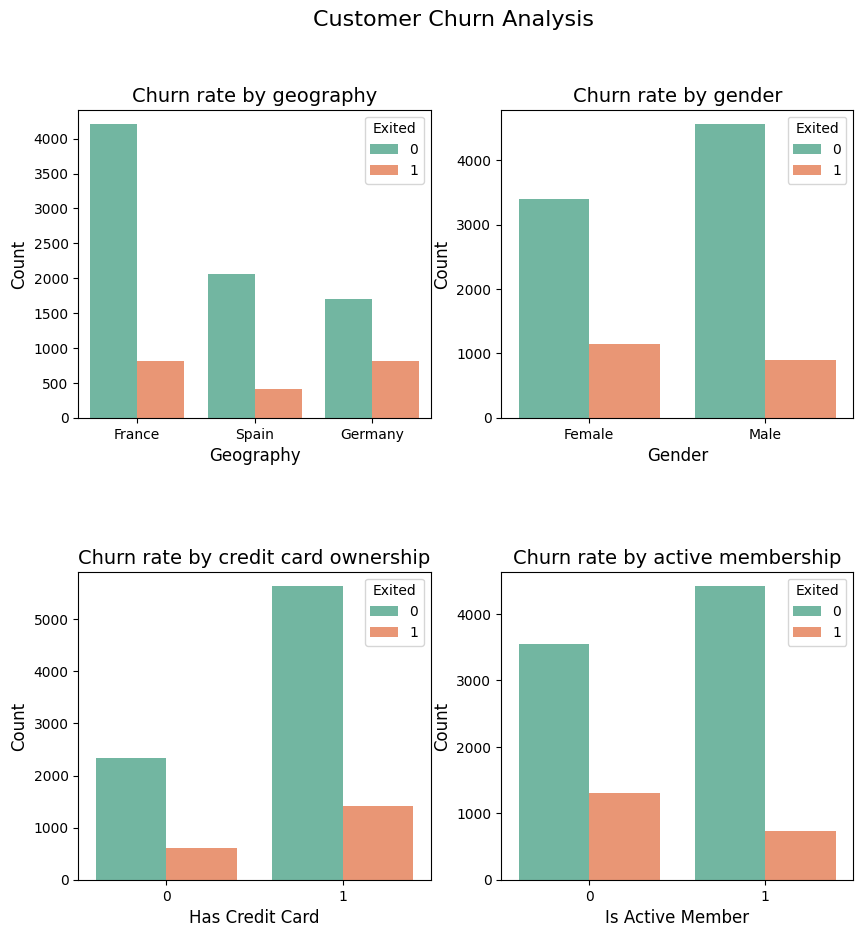

In [ ]:
# Data analysis - Data Visualization

# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

# Plot the subplots
sns.countplot(x='Geography', hue='Exited', data=churn_data, ax=axes[0, 0], palette='Set2')
sns.countplot(x='Gender', hue='Exited', data=churn_data, ax=axes[0, 1], palette='Set2')
sns.countplot(x='HasCrCard', hue='Exited', data=churn_data, ax=axes[1, 0], palette='Set2')
sns.countplot(x='IsActiveMember', hue='Exited', data=churn_data, ax=axes[1, 1], palette='Set2')

# Add informative labels and titles to the subplots and the figure
axes[0, 0].set_xlabel('Geography', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_title('Churn rate by geography', fontsize=14)
axes[0, 1].set_xlabel('Gender', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_title('Churn rate by gender', fontsize=14)
axes[1, 0].set_xlabel('Has Credit Card', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].set_title('Churn rate by credit card ownership', fontsize=14)
axes[1, 1].set_xlabel('Is Active Member', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].set_title('Churn rate by active membership', fontsize=14)
fig.suptitle('Customer Churn Analysis', fontsize=16)

# Show the plots
plt.show()

In [ ]:
# Preprocessing the dataset - Convert categorical variables into numerical form
le = LabelEncoder()
churn_data["Geography"] = le.fit_transform(churn_data["Geography"])
churn_data["Gender"] = le.fit_transform(churn_data["Gender"])

In [ ]:
# Preprocessing the dataset - Dropping irrelevant columns such as "RowNumber," "CustomerId," and "Surname" to focus on the relevant features.
new_churn_data = churn_data.drop(["RowNumber","CustomerId","Surname"], axis = 1)

In [ ]:
# Preprocessing the dataset - Representing new dataset after converting categorical variables into numerical form and dropping irrelevant columns
new_churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

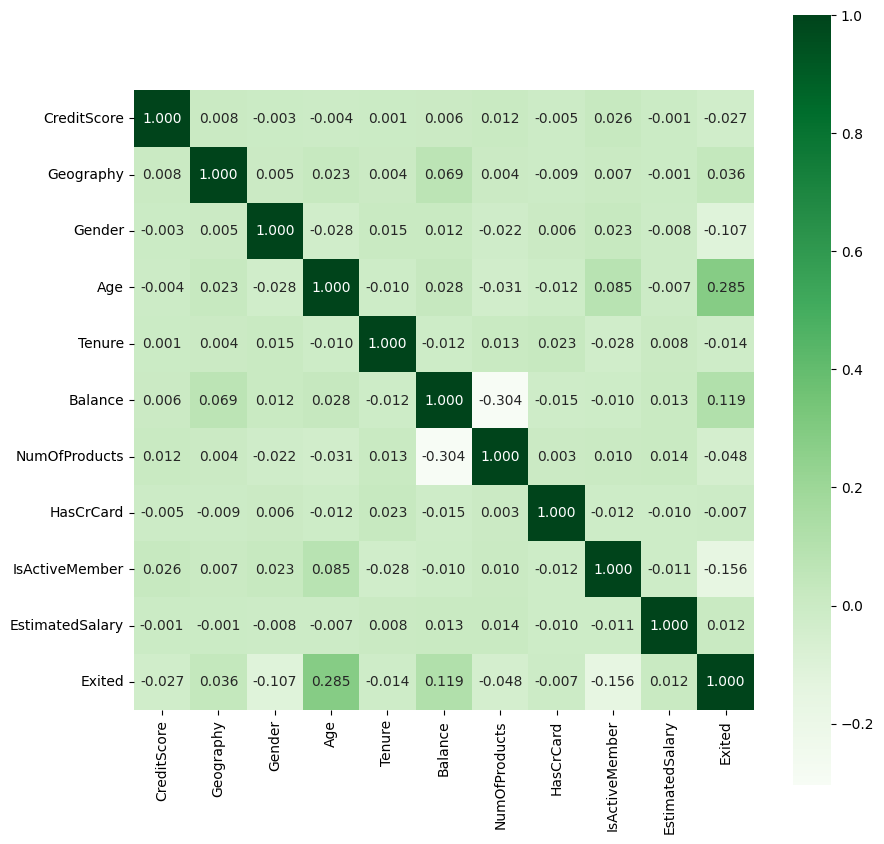

In [ ]:
# Preprocessing the dataset - A correlation analysis between the dataset's features
# Identifing relationships and dependencies among variables.
corr = new_churn_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.3f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [ ]:
# Preprocessing the dataset - based on the correlation table to have high performance,
# I choose "HasCrCard" to drop from the dataset as it had a weak correlation (-0.007) with the target variable.
x = new_churn_data.loc[:,["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","IsActiveMember","EstimatedSalary"]].values
y = new_churn_data.iloc[:,-1]
print(x.shape)
print(y.shape)

(10000, 9)
(10000,)


In [ ]:
# Preprocessing the dataset - Spliting it into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
# Preprocessing the dataset - standardizing the feature values across the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Define models and their parameters
"""
 A dictionary that contains the names of different machine learning models as keys
 and tuples of model instances and their respective parameters as values.

"""
models = {
    'Logistic Regression': (LogisticRegression(), {}),
    'K-Nearest Neighbour': (KNeighborsClassifier(), {}), 
    'SVM RBF': (SVC(kernel='rbf', gamma=0.1, C=1), {}),
    'Random Forest': (RandomForestClassifier(criterion='entropy', random_state=42), {}),
    'XGBoost': (xgb.XGBClassifier(), {}),
}

# Evaluate models
# initializing an empty dictionary to store the evaluation results of the models.
results = {}
for name, (model, params) in models.items():
    print(f"Evaluating {name}...")
    
    
    # The model is training using the fit() function  with the training data (X_train) and corresponding labels (y_train).
    # Also, the training time is calculated.  
    
    start_time = time.time()
    model.fit(X_train, y_train, **params)
    train_time = time.time() - start_time
    
    # Making prediction on the test data based on the trained model.
    # Also, the Testing time is calculated.
    start_time = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_time
    
    # Calculating the accuracy of the model
    # by comparing the predicted labels (y_pred) with the actual labels.
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Performing Cross-validation on the training data to obtain the mean accuracy.
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    mean_accuracy = accuracies.mean() * 100
    

    # The evaluation results storing in the results dictionary under the corresponding model name.
    results[name] = {
        'accuracy': accuracy,
        'mean_accuracy': mean_accuracy,
        'train_time': train_time,
        'test_time': test_time,
    }


Evaluating Logistic Regression...
Evaluating K-Nearest Neighbour...
Evaluating SVM RBF...
Evaluating Random Forest...
Evaluating XGBoost...


In [ ]:
#  Evaluation - Iterating over the results dictionary and prints the evaluation metrics for each model.

for name, result in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {result['accuracy']:.2f}")
    print(f"  Mean cross-validation accuracy: {result['mean_accuracy']:.2f}")
    print(f"  Train time: {result['train_time']:.2f} seconds")
    print(f"  Test time: {result['test_time']:.2f} seconds")


Logistic Regression:
  Accuracy: 0.81
  Mean cross-validation accuracy: 81.01
  Train time: 0.01 seconds
  Test time: 0.00 seconds
K-Nearest Neighbour:
  Accuracy: 0.84
  Mean cross-validation accuracy: 83.76
  Train time: 0.01 seconds
  Test time: 0.16 seconds
SVM RBF:
  Accuracy: 0.86
  Mean cross-validation accuracy: 85.49
  Train time: 1.24 seconds
  Test time: 0.24 seconds
Random Forest:
  Accuracy: 0.86
  Mean cross-validation accuracy: 85.79
  Train time: 1.18 seconds
  Test time: 0.04 seconds
XGBoost:
  Accuracy: 0.86
  Mean cross-validation accuracy: 85.35
  Train time: 0.67 seconds
  Test time: 0.00 seconds


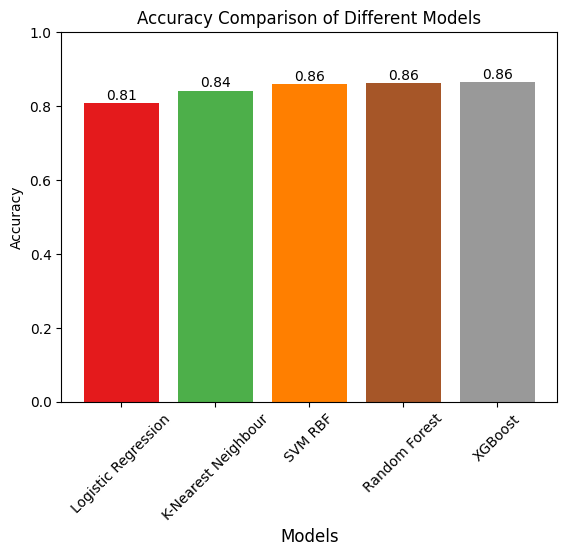

In [ ]:
# Evaluation - Results - Visualizating the accuracy comparison of different models.
accuracy_values = [results[name]['accuracy'] for name in models.keys()]
model_names = list(models.keys())

# Creating a color map for the bars
colors = plt.cm.Set1(np.linspace(0, 1, len(model_names)))

fig, ax = plt.subplots()
# Creating the bar plot with color customization
ax.bar(model_names, accuracy_values, color=colors)
ax.set_ylim(0, 1)
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy')

# Adding labels and value annotations to the bars
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')

plt.xticks(rotation=45)
plt.title('Accuracy Comparison of Different Models')
plt.show()

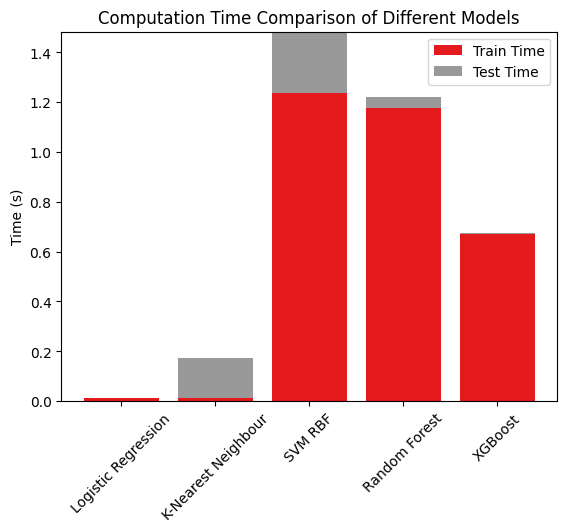

In [ ]:
# Evaluation - Results - visualizing the comparison of computation times (train time and test time) for different models

train_time_values = [results[name]['train_time'] for name in models.keys()]
test_time_values = [results[name]['test_time'] for name in models.keys()]
model_names = list(models.keys())

# Creating a color map for the bars
colors = plt.cm.Set1(np.linspace(0, 1, 2))

fig, ax = plt.subplots()
ax.bar(model_names, train_time_values, label='Train Time', color = colors[0])
ax.bar(model_names, test_time_values, bottom=train_time_values, label='Test Time', color = colors[1])
ax.set_ylim(0, max(train_time_values + test_time_values) * 1.2)
ax.set_ylabel('Time (s)')
ax.tick_params(axis='x', rotation=45)
ax.legend()
ax.set_title('Computation Time Comparison of Different Models')
plt.show()



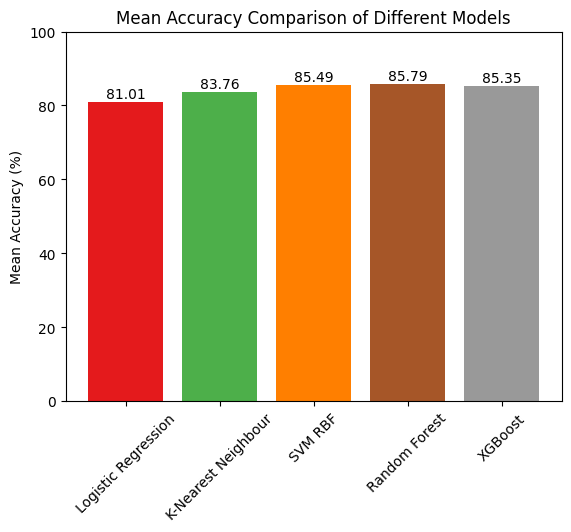

In [ ]:
# Evaluation - Results - Visualizing the mean accuracies of different models

mean_accuracies = [results[name]['mean_accuracy'] for name in models.keys()]


ax.bar(models.keys(), mean_accuracies)

# Create a list of mean accuracies for each model
mean_accuracies = [results[name]['mean_accuracy'] for name in models.keys()]

# Creating a color map for the bars
colors = plt.cm.Set1(np.linspace(0, 1, len(model_names)))

# Plot the mean accuracies
fig, ax = plt.subplots()
ax.bar(models.keys(), mean_accuracies, color = colors)
ax.set_ylim(0, 100)
ax.set_ylabel('Mean Accuracy (%)')

# Add text labels on top of each bar
for i, v in enumerate(mean_accuracies):
    ax.text(i, v + 1, str(round(v, 2)), ha='center')

plt.xticks(rotation=45)
plt.title('Mean Accuracy Comparison of Different Models')
plt.show()



### 1.2.6 Conclusion - Classification
* Based the results, Random Forest, SVM RBF, and XGBoost perform similarly well in terms of accuracy, with an accuracy score of 0.86 on the test set. Logistic Regression and K-Nearest Neighbour, on the other hand, have a slightly lower accuracy score.
* In terms of training and testing time, Logistic Regression and K-Nearest Neighbour are the fastest models to train and test. On the other hand, SVM RBF, Random Forest, and XGBoost have longer training times, with SVM RBF having the longest training time of 1.24 seconds.
* In terms of cross-validation accuracy, Random Forest and SVM RBF have the highest mean cross-validation accuracy, with Random forest having the highest mean cross-validation accuracy, while XGBoost has a slightly lower mean cross-validation accuracy of 85.35%.
* Overall, in this dataset and classification problem, the ensemble methods (Random Forest and XGBoost) have a slight advantage over the single models (Logistic Regression and K-Nearest Neighbour) in terms of accuracy and cross-validation accuracy (with the exception of SVM), but they require longer training times beside SVM.

## 1.3 Regression Problem

### 1.3.1 Dataset
For the Regression task, we selected the **California housing dataset**, which contains information about housing prices and related factors in various neighborhoods in California. The target variable is the median house value in units of 100,000 USD. We obtained this dataset from Scikit-learn, using its built-in functionality. The dataset consists of 20,640 instances, each representing a specific block in California. It has eight features that can be used to predict the median house value in that block. 

### 1.3.2 Preprocessing
Before proceeding with the analysis, we performed a preliminary data exploration to gain insights into the dataset. Fortunately, the data contains no null records, and there is no requirement for label encoding. we will use all features in our models. 

We proceeded to split it into training and testing sets. This division is crucial for evaluating the models' performance accurately. We utilized the widely-used "train_test_split" function from the scikit-learn library to perform this task.

To ensure fair comparisons, we employed scaling techniques to standardize the feature values across the dataset. Scaling prevents any particular feature from dominating the model due to differences in their scales. We applied a scaler to the dataset, a subject that will be further elaborated upon in subsequent question.

### 1.3.3 Algorithms

For this comparative analysis, we selected five different models:

* Linear regression
* K-Nearest Neighbour
* Random Forest
* XGBoost

#### 1.3.3.1 Linear regression
Linear regression is a statistical modeling technique used to understand and predict the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, meaning that the relationship can be approximated by a straight line.
The form of a linear regression model can be expressed as:


$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \varepsilon $$

Where:

$Y$ is the dependent variable or the variable to be predicted. <br>
$X_1, X_2, ..., X_n$ are the independent variables or predictors.<br>
$β₀$ is the y-intercept or the constant term.<br>
$\beta_0,\beta_1,...,\beta_n$ is the slope or the coefficient associated with the independent variables.<br>
$ε$ is the error term or the residual, representing the unexplained variation in the dependent variable.<br>
The goal of linear regression is to estimate the values of $\beta_0,\beta_1,...,\beta_n$ that minimize the sum of the squared differences between the observed dependent variable values and the predicted values. This is known as the method of least squares.

The objective of linear regression is to estimate the values of $\beta_0, \beta_1, ..., \beta_n$ that minimize the sum of the squared differences between the observed dependent variable values $y_i$ and the predicted values $\hat{y}_i$:

$$\min_{\beta_0, \beta_1, ..., \beta_n} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$


 This approach is known as the method of least squares. By minimizing the sum of squared residuals, the regression model provides the best-fitting line that represents the relationship between the variables.



#### 1.3.3.2 Decision tree

A decision tree is a popular machine learning algorithm that is used for both classification and regression tasks. It is a flowchart-like structure where internal nodes represent feature tests or decisions, branches represent possible outcomes, and leaf nodes represent the final predictions or target values. The algorithm learns a decision tree by recursively partitioning the input data based on the features, aiming to create homogeneous subsets with respect to the target variable.

The Decision Tree Regressor follows the same principles as the decision tree for classification but differs in how it determines the predicted value at each leaf node.

Instead of selecting the majority class, the Decision Tree Regressor calculates the average (or median) value of the target variable within the leaf node. This average becomes the predicted value for any new data point that falls into that particular leaf node.

During the training process, the algorithm constructs a regression tree by finding the best feature and split point that minimizes a chosen criterion, often the mean squared error (MSE) or mean absolute error (MAE). The regression tree continues to split the data into subsets based on these splits until the stopping conditions are met.

Once the Decision Tree Regressor is trained, it can be used to make predictions on new, unseen data by traversing the tree based on the feature values of the data point until reaching a leaf node. The predicted value associated with that leaf node is then returned as the final prediction.

Decision Tree Regressors have the advantage of being interpretable, as the resulting tree structure can be easily visualized and understood. However, they can be prone to overfitting if the tree is too complex or the data contains noise. 





#### 1.3.3.3 Random Forest

Random Forest Regressor is a machine learning algorithm specifically designed for regression tasks. It is an ensemble learning method that leverages the power of decision trees to make accurate predictions on continuous numerical data.

Similar to the Random Forest classifier, the Random Forest Regressor builds an ensemble of decision trees. However, instead of using a majority vote, it combines the predictions of individual trees by taking the average of their outputs. This averaging process enables the Random Forest Regressor to estimate continuous target variables rather than discrete class labels. Also it uses randomness during tree construction to ensure diversity and reduce overfitting.

Random Forest Regressors have advantages such as robustness, handling missing data, and dealing with high-dimensional datasets. They also provide insights into feature importance for feature selection and understanding the data.

#### 1.3.3.4 XGBoost

Explained in the last secction.


### 1.3.4 Evaluation
 we will evaluate the comparative performance of different machine learning algorithms using three key metrics: Mean Squared Error (MSE), R-squared (R2), and computation time (train time and test time). These metrics will provide valuable insights into the accuracy and efficiency of the models. By examining these metrics, we can assess the strengths and weaknesses of each algorithm, enabling us to make informed decisions about their suitability for diverse datasets and problem domains.

 #### 1.3.4.1 Mean Squared Error (MSE)
Mean Squared Error is a commonly used metric to evaluate the performance of regression models. It measures the average squared difference between the predicted values and the actual values in the dataset. A lower MSE indicates a better fit of the model to the data.
Formula for Mean Squared Error:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

where:

$n$ is the number of data points.

$y_i$ is the actual value of the target variable for the $i^{th}$ data point.

$\hat{y}_i$ is the predicted value of the target variable for the $i^{th}$ data point. <br><br>




 #### 1.3.4.2 R-squared (R2)

 R-squared, also known as the coefficient of determination, provides a measure of how well the regression model fits the data. It represents the proportion of the variance in the dependent variable that can be explained by the independent variables. R2 ranges from 0 to 1, where 0 indicates that the model does not explain any variance, and 1 indicates a perfect fit.
 Formula for R-squared:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
 where:

$n$ is the number of data points.

$y_i$ is the actual value of the target variable for the $i$th data point.

$\hat{y}_i$ is the predicted value of the target variable for the $i$th data point.

$\bar{y}$ is the mean of the actual values of the target variable.<br><br>


 #### 1.3.4.3 Computation time (train time, test time):
  Computation time refers to the amount of time taken by a model to train and make predictions on the dataset. Train time is the time taken by the model to train on the training set, while test time is the time taken by the model to make predictions on the testing set. To have a comprehensive understanding of the time complexity of a model, it is necessary to consider both the training time and the test time. However, the importance of each can vary depending on the specific context and requirements of the application.
  
  In some cases, the training time may be the primary concern, especially when dealing with large datasets or complex models that require extensive computational resources. For example, in scenarios where the model is trained offline and the predictions are made infrequently, optimizing the training time may be the main focus.
  
  In other cases, the test time may be more critical, particularly when real-time or low-latency predictions are required. In such scenarios, even if the model has a long training time, it may still be acceptable as long as the test time remains within the desired constraints.
  
  Therefore, to fully evaluate the time complexity of a machine learning model, it is essential to consider both the training time and the test time, taking into account the specific requirements and constraints of the application.

 ### 1.3.5 Coding 

In [ ]:
# Reading the dataset
california_housing = fetch_california_housing(as_frame = True)
california_housing = california_housing.frame
california_housing


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Data analysis - Display information about the dataset
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Preprocessing the dataset - Spliting it into training and testing sets
# Here we choose all features in dataset for training and testing the model.
X_train, X_test, y_train, y_test = train_test_split(
                 california_housing[["MedInc","HouseAge","AveRooms","Population","AveBedrms","AveOccup","Latitude","Longitude"]],
                 california_housing["MedHouseVal"])

In [ ]:
# Preprocessing the dataset - standardizing the feature values across the dataset
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [ ]:
# Define models and their parameters
"""
 A dictionary that contains the names of different machine learning models as keys
 and tuples of model instances and their respective parameters as values.

"""
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree Regressor': (DecisionTreeRegressor(),{}),
    'Random Forest Regressor': (RandomForestRegressor(n_estimators = 10),{}),
    'XGBoost Regressor': (xgb.XGBRegressor(),{}),

}



# Evaluate models
# initializing an empty dictionary to store the evaluation results of the models.
results = {}
for name, (model, params) in models.items():
    print(f"Evaluating {name}...")
    
    # The model is training using the fit() function  with the training data (X_train) and corresponding labels (y_train).
    # Also, the training time is calculated.
    start_time = time.time()
    model.fit(X_train_s, y_train, **params)
    train_time = time.time() - start_time

    
    # Making prediction on the test data based on the trained model.
    # Also, the Testing time is calculated.
    
    start_time = time.time()
    y_pred = model.predict(X_test_s)
    test_time = time.time() - start_time
    
    
    # Calculating the Mean Squared Error (MSE) and R-squared (R2) of the model
    # by comparing the predicted labels (y_pred) with the actual labels.
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    
    
    # The evaluation results storing in the results dictionary under the corresponding model name.
    results[name] = {
        'mse': mse,
        'r2': r2,
        'train_time': train_time,
        'test_time': test_time,
    }

Evaluating Linear Regression...
Evaluating Decision Tree Regressor...
Evaluating Random Forest Regressor...
Evaluating XGBoost Regressor...


In [ ]:
#  Evaluation - Iterating over the results dictionary and prints the evaluation metrics for each model.
for name, result in results.items():
    print(f"\n{name}:")
    print(f"MSE: {result['mse']}")
    print(f"R2 score: {result['r2']}")
    print(f"Train time: {result['train_time']} seconds")
    print(f"Test time: {result['test_time']} seconds")


Linear Regression:
MSE: 0.5257297737090895
R2 score: 0.5958874592345818
Train time: 0.02320551872253418 seconds
Test time: 0.0011436939239501953 seconds

Decision Tree Regressor:
MSE: 0.5437668187948256
R2 score: 0.5820229294285706
Train time: 0.3070366382598877 seconds
Test time: 0.0 seconds

Random Forest Regressor:
MSE: 0.28899691337117206
R2 score: 0.7778568329660333
Train time: 3.414869785308838 seconds
Test time: 0.031702280044555664 seconds

XGBoost Regressor:
MSE: 0.23366321587975422
R2 score: 0.8203901689143513
Train time: 3.0698397159576416 seconds
Test time: 0.013010978698730469 seconds


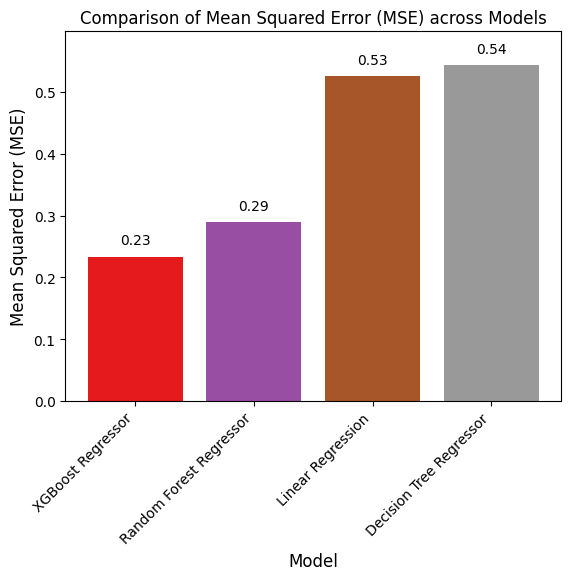

In [ ]:
# Evaluation - Results - Visualizing the Mean Squared Error (MSE) for each model

mean_mse_results = [(name, result['mse']) for name, result in results.items()]

# Sort models by increasing mean MSE
mean_mse_results.sort(key=lambda x: x[1])


# Creating a color map for the bars
model_names = list(models.keys())
colors = plt.cm.Set1(np.linspace(0, 1, len(model_names)))


# Create bar chart with customized style
fig, ax = plt.subplots()
ax.bar([x[0] for x in mean_mse_results], [x[1] for x in mean_mse_results], color=colors)


# Set title and axis labels
plt.title("Comparison of Mean Squared Error (MSE) across Models")
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust y-axis limits for better visualization
plt.ylim(0, max([x[1] for x in mean_mse_results]) * 1.1)

# Add data labels above each bar
for i, value in enumerate([x[1] for x in mean_mse_results]):
    ax.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

# Show the plot

plt.show()


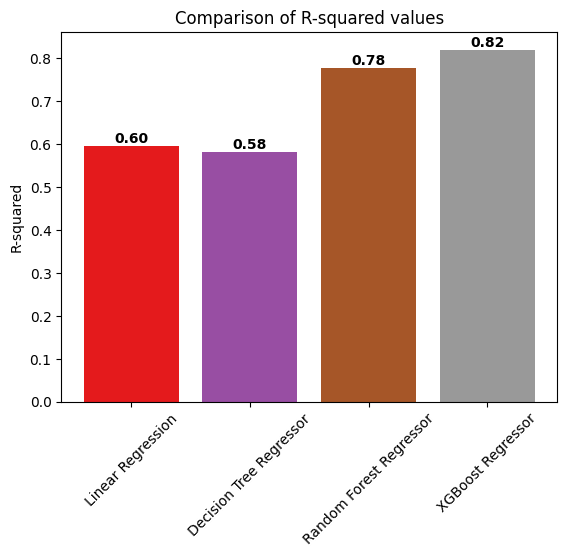

In [ ]:
# Evaluation - Results - Visualizing the R-squared values for each model

rsquared_values = [result['r2'] for result in results.values()]

# Creating a color map for the bars
model_names = list(models.keys())
colors = plt.cm.Set1(np.linspace(0, 1, len(model_names)))

# Add data labels to the bars
for i, value in enumerate(rsquared_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# Create bar chart
plt.bar(range(len(results)), rsquared_values, color = colors )
plt.xticks(range(len(results)), results.keys(), rotation=45)
plt.ylabel('R-squared')
plt.title('Comparison of R-squared values')
plt.xticks(rotation=45)
plt.show()

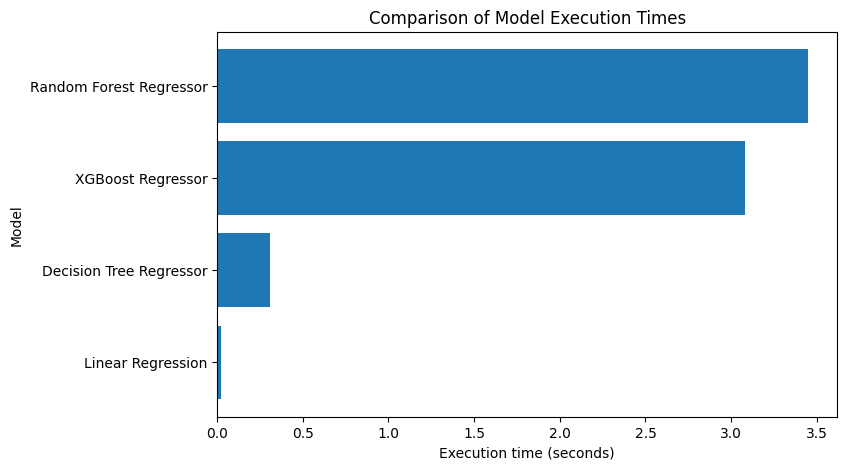

In [ ]:
# Get the execution times for each model
execution_times = [(name, results[name]['train_time'] + results[name]['test_time']) for name in results]

# Sort the models by execution time
execution_times.sort(key=lambda x: x[1])

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh([i[0] for i in execution_times], [i[1] for i in execution_times])
ax.set_xlabel('Execution time (seconds)')
ax.set_ylabel('Model')
ax.set_title('Comparison of Model Execution Times')
plt.show()

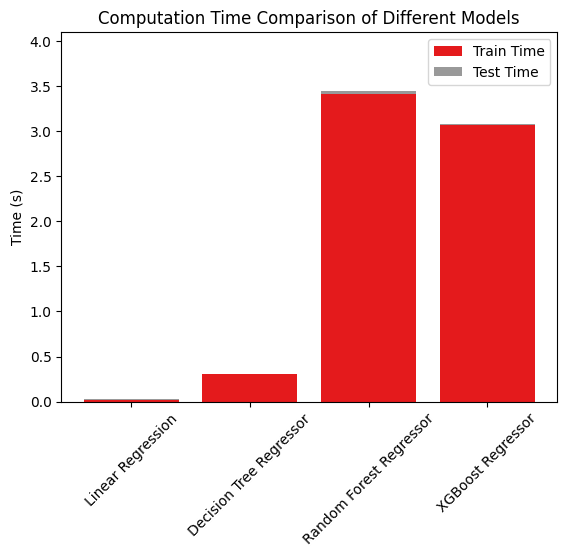

In [ ]:
# Evaluation - Results - visualizing the comparison of computation times (train time and test time) for different models

train_time_values = [results[name]['train_time'] for name in models.keys()]
test_time_values = [results[name]['test_time'] for name in models.keys()]
model_names = list(models.keys())

# Creating a color map for the bars
colors = plt.cm.Set1(np.linspace(0, 1, 2))

fig, ax = plt.subplots()
ax.bar(model_names, train_time_values, label='Train Time', color = colors[0])
ax.bar(model_names, test_time_values, bottom=train_time_values, label='Test Time', color = colors[1])
ax.set_ylim(0, max(train_time_values + test_time_values) * 1.2)
ax.set_ylabel('Time (s)')
ax.tick_params(axis='x', rotation=45)
ax.legend()
ax.set_title('Computation Time Comparison of Different Models')
plt.show()

## 1.3.6 Conclusion - Regression

* Based on the results obtained, both XGBoost and Random Forest demonstrate comparable performance in terms of Mean Squared Error (MSE), achieving MSE scores of 23 and 29 respectively on the test set. Conversely, Linear Regression and Decision Tree exhibit higher MSE rates, scoring 53 and 54 respectively. It is important to note that a lower MSE indicates better predictive performance.

* When considering R-Squared, XGBoost outperforms the other models with a rate of 0.82, while Random Forest follows closely with a rate of 0.78. In contrast, Linear Regression and Decision Tree yield lower R-Squared values, approximately 0.6.

* Regarding training and testing times, Linear Regression and Decision Tree prove to be the fastest models for both training and testing. Conversely, ensemble models such as Random Forest and XGBoost require longer training times.

* Overall, in this specific dataset and regression problem, ensemble methods (Random Forest and XGBoost) possess a slight advantage over single models (Linear Regression and Decision Tree) in terms of accuracy, as indicated by MSE and R-Squared. However, it is worth noting that ensemble methods necessitate longer training times.

## 1.4 Overall conclusion

* Single models are generally faster than ensemble methods. However, ensemble methods offer higher accuracy in predictions.


# 2. Question Two

**What is the importance of data scaling in machine learning? How does it impact the performance of different algorithms?**

## 2.1 Introduction
The process of scaling a dataset in machine learning involves transforming its features or variables to a consistent size. It is also known as feature scaling or normalization. Various features within a dataset may have different scales, ranges, or units of measurement, therefore data scaling is required. As an example, consider a dataset with features like age (from 0 to 100), income (from 0 to 100,000), and experience years (from 0 to 20). 

Machine-learning models can run into issues when these features are used together, as they have different scales. The learning process can become biased or inaccurate if one feature has a much larger scale than another. In order to address these issues, the data scaling process transforms the values of each feature into a standard scale. As a result, all features contribute equally to the learning process, preventing any one feature from dominating the process.

In this project, we aimed to compare the performance of Logistic Regression and Decision Tree algorithms on a dataset before and after applying the data scaling method. Standardization, commonly referred to as Z-score scaling, was used as the scaling technique.


### 2.2 Dataset

To address this question, we selected the **Wine dataset** as a classification problem. This data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. The dataset contains 178 chemical analysis samples of wines belonging to 3 different classes. Each sample is described by 13 features. The classes are distributed as follows: class_0 (59), class_1 (71), class_2 (48) There are no missing or null values. The target variable in this dataset is a classes of wine. The dataset has features with different scales to observe the impact of scaling. We obtained this dataset from sklearn.

### 2.3 Preprocessing
Before proceeding with the analysis, we performed a preliminary data exploration and visualization to gain insights into the dataset. To further enhance the feature set, we conducted a correlation analysis between the dataset's features. This process, known as feature engineering, helps identify relationships and dependencies among variables. Based on the correlation analysis, we decided to select all features. Hopefully the data is ready to fit to the model.

Once the dataset was prepared, we proceeded to split it into training and testing sets. This division is crucial for evaluating the models' performance accurately. We utilized the widely-used "train_test_split" function from the scikit-learn library to perform this task.

To address this question, we fit the model with and without scaling the dataset. It is important to note that standardization should be applied consistently across the training, validation, and test sets to maintain consistency in the scaling process and ensure the model is evaluated correctly on new data. 


### 2.4 Algorithms

For this comparative analysis, we selected two different algotithms:

* Logistic Regression
* Decision tree

#### 2.4.1 Logistic Regression
Logistic regression is a statistical modeling technique commonly used for binary classification problems. It is particularly suited for situations where the dependent variable, or the variable being predicted, is categorical with only two possible outcomes, such as "yes" or "no," "true" or "false," or "0" or "1." The main objective of logistic regression is to predict the probability that an instance belongs to a particular class.

While logistic regression is primarily used for binary classification, it can also be extended to handle multi-class classification problems. Several strategies exist for adapting logistic regression to handle multiple classes.

In logistic regression, the relationship between the independent variables (predictors) and the probability of the outcome is modeled using the logistic function, also known as the sigmoid function. The sigmoid function maps any real-valued number to a value between 0 and 1, representing the probability of an event occurring. The logistic regression equation can be expressed as follows:

$$
p = \frac{1}{1 + e^{-z}}
$$

Here, p denotes the probability of the event occurring, e represents the base of the natural logarithm (approximately 2.718), and z represents the linear combination of the independent variables and their corresponding coefficients:

$$z = b0 + b1x1 + b2x2 + ... + bnxn$$

The coefficients (b0, b1, b2, ..., bn) are estimated using a technique called maximum likelihood estimation (MLE), which seeks to find the values that maximize the likelihood of observing the given data.

The likelihood function in logistic regression is calculated as the product of the individual probabilities of the observed outcomes. Given a set of training data, the likelihood function is defined as:

$$L(b0, b1, b2, ..., bn) = ∏[p^yi * (1 - p)^(1-yi)]$$

where yi represents the true class label (0 or 1) of the ith instance, and p is the predicted probability from the logistic regression model.

The goal of maximum likelihood estimation is to find the values of the coefficients that maximize the likelihood function. In practice, it is more convenient to maximize the log-likelihood function, which is the natural logarithm of the likelihood function:

$$log L(b0, b1, b2, ..., bn) = ∑[yi * log(p) + (1 - yi) * log(1 - p)]$$

To determine the optimal values of the coefficients, logistic regression uses optimization algorithms such as gradient descent or other numerical optimization techniques. These algorithms iteratively update the coefficients to minimize the negative log-likelihood (or maximize the log-likelihood), leading to the best-fitting model for the given data.

Once the coefficients are estimated, logistic regression uses a threshold (usually 0.5) to classify instances into one of the two classes based on their predicted probabilities. If the predicted probability exceeds the threshold, the instance is classified as belonging to one class, while if it falls below the threshold, it is classified as belonging to the other class.


#### 2.4.2 Decision tree

A decision tree is a popular machine learning algorithm that is used for both classification and regression tasks. It is a flowchart-like structure where internal nodes represent feature tests or decisions, branches represent possible outcomes, and leaf nodes represent the final predictions or target values. The algorithm learns a decision tree by recursively partitioning the input data based on the features, aiming to create homogeneous subsets with respect to the target variable.

The Decision Tree Regressor follows the same principles as the decision tree for classification but differs in how it determines the predicted value at each leaf node.

Instead of selecting the majority class, the Decision Tree Regressor calculates the average (or median) value of the target variable within the leaf node. This average becomes the predicted value for any new data point that falls into that particular leaf node.

During the training process, the algorithm constructs a regression tree by finding the best feature and split point that minimizes a chosen criterion, often the mean squared error (MSE) or mean absolute error (MAE). The regression tree continues to split the data into subsets based on these splits until the stopping conditions are met.

Once the Decision Tree Regressor is trained, it can be used to make predictions on new, unseen data by traversing the tree based on the feature values of the data point until reaching a leaf node. The predicted value associated with that leaf node is then returned as the final prediction.

Decision Tree Regressors have the advantage of being interpretable, as the resulting tree structure can be easily visualized and understood. However, they can be prone to overfitting if the tree is too complex or the data contains noise.

### 2.5 Scaling Method
 While there are plenty of data scaling approaches accessible, selecting the most suitable scale methodology remains one of the primary issues in ML. There are no particular strategies available for selecting the most suitable scaling approaches for any given record, so researchers need to play with ML algorithms using multiple trials in order to find the best ones. (Ahsan et al., 2021)
 ### 2.5.1 Standardization (Z-score)
  Standardization is a data scaling technique that transforms the features of a dataset to have zero mean and unit variance. This process aims to make the feature values comparable and easier to interpret. It involves the following steps:
   1.	Calculation of Mean (μ) and Standard Deviation (σ): The mean and standard deviation of the feature to be standardized are calculated across the entire dataset.

   2.	Centering the Data: Each value in the feature column is subtracted by the mean, which centers the data around zero.
      centered_value = value - mean
      
   3.	Scaling the Data: Each centered value is divided by the standard deviation, which scales the data to have a unit variance.
      standardized_value = centered_value / standard_deviation
      
  By applying standardization, the standardized feature will have a mean of 0 and a standard deviation of 1. This ensures that the feature values are comparable and have a similar scale, which is important for many machine-learning algorithms. 
  It's important to note that standardization does not change the shape or distribution of the data. It only rescales the values while maintaining the relationship between them. Also, standardization assumes that the data follows a roughly Gaussian (normal) distribution. If the data is highly skewed or has outliers, other scaling techniques or data preprocessing methods may be more appropriate.


### 2.6 Evaluation
 we will evaluate the comparative performance of these two machine learning algorithms using accuracy. These metric will provide valuable insights into the performance of two algorithms with/wothout scaling the data. 

 #### 2.6.1 Accuracy
  Accuracy is one of the most common evaluation metrics used in machine learning. It measures the percentage of correct predictions made by a model out of all the predictions made. In other words, accuracy is calculated as the number of correctly predicted instances divided by the total number of instances in the dataset. A higher accuracy indicates that the model is making more correct predictions. In other words: $$Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)$$ 
  To further illustrate the concept of accuracy, we can represent the predictions of a binary classification model using a confusion matrix. A confusion matrix is a table that summarizes the model's predictions compared to the actual labels. It consists of four key elements: 
* True Positives (TP): The model correctly predicted the positive class.
* True Negatives (TN): The model correctly predicted the negative class.
* False Positives (FP): The model incorrectly predicted the positive class when the true label was negative (Type I error).
* False Negatives (FN): The model incorrectly predicted the negative class when the true label was positive (Type II error).


\begin{array}{c|c|c}
 &  \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & \text{TN} & \text{FP} \\
\text{Actual Positive} & \text{FN} & \text{TP} \\
\end{array}


 ### 2.6 Coding


In [ ]:
# Read the dataset 
data = load_wine(as_frame=True)

# Create a pandas dataframe with the dataset
wine_data = pd.DataFrame(data['data'], columns=data['feature_names'])
wine_data['target'] = data['target']

In [ ]:
# Data analysis
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# Data analysis - Display information about the dataset
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
# Data analysis - Display the shape the dataset
wine_data.shape

(178, 14)

In [ ]:
# Data analysis - Display some statistical information about the columns of the dataset
wine_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# Data analysis - Checking about the NUll values in dataset 
wine_data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

<Axes: >

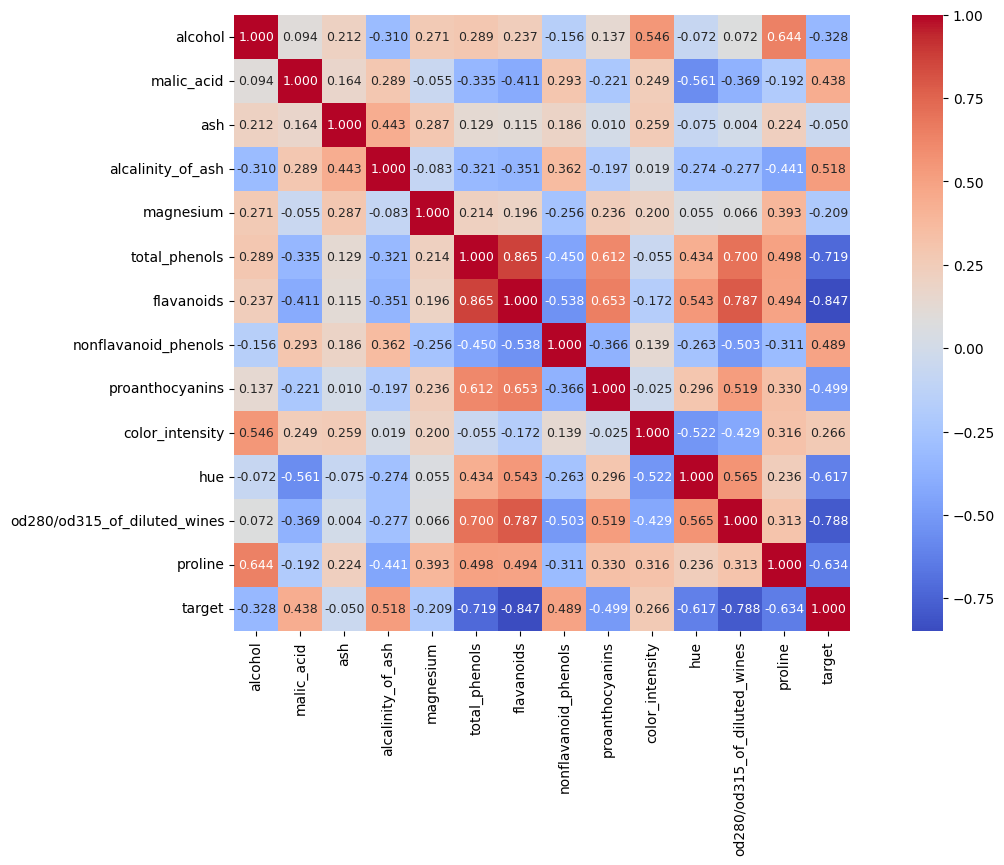

In [ ]:
# Preprocessing the dataset - A correlation analysis between the dataset's features
# Identifing relationships and dependencies among variables.
corr = wine_data.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.3f', annot=True, annot_kws={'size':9}, cmap='coolwarm')

<Axes: xlabel='target', ylabel='count'>

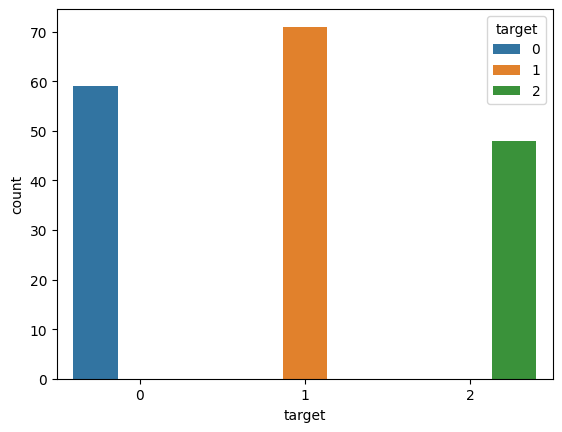

In [ ]:
# Data analysis - Data Visualization
sns.countplot(x='target', data=wine_data, hue='target')


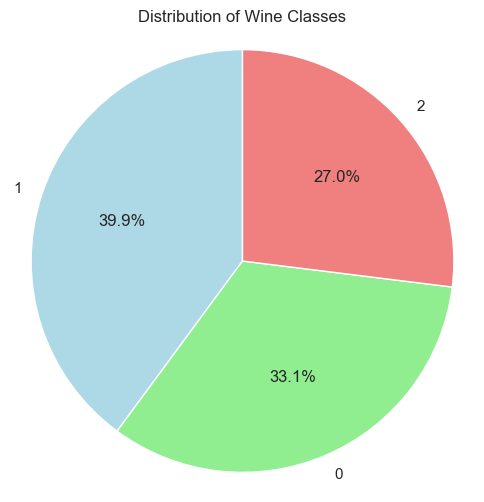

In [ ]:
# Data analysis - Data Visualization

class_counts = wine_data['target'].value_counts()

# Creating a pie chart
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral']
plt.pie(class_counts, labels=class_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Distribution of Wine Classes')

# Displaying the pie chart
plt.axis('equal')
plt.show()


In [ ]:
# Preprocessing the dataset - Spliting it into training and testing sets
# Based on correlation analysis between the dataset's features, we understand that all feature are important for target label.
# SO we choose all features in dataset for training and testing the model.
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)


In [ ]:
# Preprocessing the dataset - standardizing the feature values across the dataset
# Apply scaling to the training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#training two algorithms on non-scaled/scaled dataset

# Train a Logistic Regression classifier on the unscaled data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Training the Logistic Regressionon non-scaled dataset is done")

# Train a Logistic Regression classifier on the scaled data
logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train)
y_pred_logreg_scaled = logreg_scaled.predict(X_test_scaled)
print("Training the Logistic Regressionon on scaled dataset is done")

# Train a Decision Tree classifier on the unscaled data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Training the Decision Tree on non-scaled dataset is done")

# Train a Decision Tree classifier on the scaled data
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train_scaled, y_train)
y_pred_dt_scaled = dt_scaled.predict(X_test_scaled)
print("Training the Decision Tree on scaled dataset is done")

# Calculate the accuracy scores for each classifier
acc_logreg = metrics.accuracy_score(y_test, y_pred_logreg)
acc_logreg_scaled = metrics.accuracy_score(y_test, y_pred_logreg_scaled)
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
acc_dt_scaled = metrics.accuracy_score(y_test, y_pred_dt_scaled)



Training the Logistic Regressionon non-scaled dataset is done
Training the Logistic Regressionon on scaled dataset is done
Training the Decision Tree on non-scaled dataset is done
Training the Decision Tree on scaled dataset is done


C:\Users\Mohammad\anaconda3\envs\SFML\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
models = ['Logistic Regression', 'Scaled Logistic Regression', 'Decision Tree', 'Scaled Decision Tree']
accuracies = [acc_logreg, acc_logreg_scaled, acc_dt, acc_dt_scaled]

for model, accuracy in zip(models, accuracies):
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy}\n")

Model: Logistic Regression
Accuracy: 0.9722222222222222

Model: Scaled Logistic Regression
Accuracy: 1.0

Model: Decision Tree
Accuracy: 0.9444444444444444

Model: Scaled Decision Tree
Accuracy: 0.9444444444444444



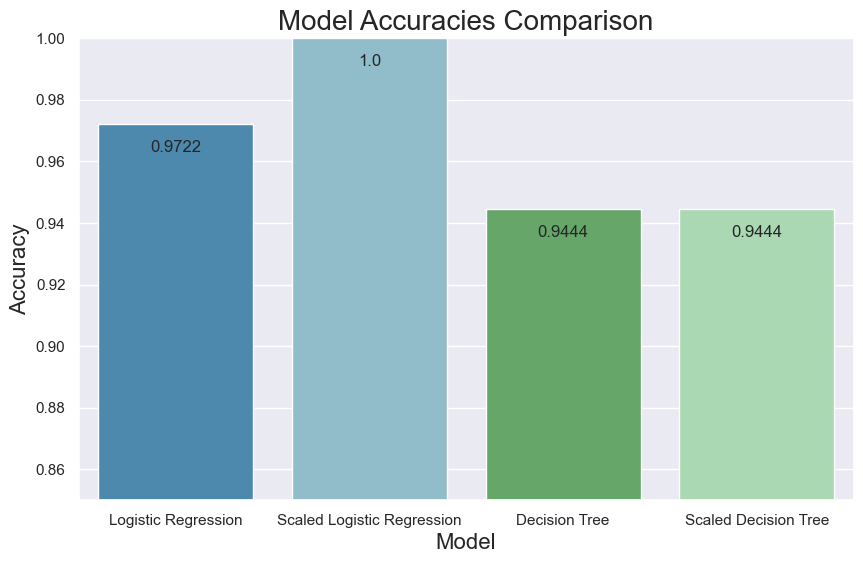

In [ ]:
# Evaluation - Results - Visualizating the accuracy comparison of different model with\without scaling on dataset.

# Define models and accuracy scores
models = ['Logistic Regression', 'Scaled Logistic Regression', 'Decision Tree', 'Scaled Decision Tree']
accuracies = [acc_logreg, acc_logreg_scaled, acc_dt, acc_dt_scaled]

# Set up plot style
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

# Define color palette
colors = ['#3C8DBC', '#87C2D4', '#5BB15F', '#A3DFAE']

# Create bar plot
ax = sns.barplot(x=models, y=accuracies, palette=colors)

# Add annotations
for i, v in enumerate(accuracies):
    ax.text(i, v - 0.01, str(round(v, 4)), ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Model Accuracies Comparison', fontsize=20)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim(0.85, 1.0)

# Show plot
plt.show()


## 2.7.Conclusion
 Based on the comparison of Logistic Regression and Decision Tree algorithms with the Standardization data scaling method, the performance of Logistic Regression improved after applying Standardization. By scaling the features, the algorithm was able to consider the relative importance and impact of each feature equally. This resulted in better results in terms of accuracy. Standardization helped in achieving a more reliable and consistent model for Logistic Regression. 
 
 In contrast to Logistic Regression, there was no change in the performance of the Decision Tree algorithm after applying Standardization. The Decision Tree algorithm inherently partitions the feature space based on thresholds and does not depend on the scale of the features. As a result, Standardization had almost no impact on the Decision Tree model's performance.
 
 The differential impact of Standardization on the two algorithms suggests that the choice of scaling method depends on the characteristics of the algorithm being used. Logistic Regression, which is sensitive to the scale of features, can benefit greatly from Standardization. On the other hand, Decision Tree, being a non-parametric algorithm, is less affected by feature scales and may not require scaling for performance improvement.

# 3. Question Three

**What is overfitting in machine learning? How can it be prevented? What are the different regularization techniques used in machine learning, and which one is considered better?**

## 3.1.Introduction

In this question, we will explore the concept of overfitting and delve into effective prevention strategies. Additionally, we will delve into the concept of regularization and its purpose. We will discuss various regularization techniques and how to apply them effectively. Furthermore, we will take a look at the explanation of the Grid search concept and its practical applications.

## 3.2.Dataset

To address this question, we opted to utilize the Boston Housing dataset, a well-known resource for regression problems. This dataset provides insights into housing prices and associated factors across diverse neighborhoods in Boston. We obtained a customized version of this dataset from GitHub. It consists of 506 records and encompasses 105 features.


## 3.3.Explanation related to question and algorithms

Overfitting is a common problem in machine learning where a model is trained to fit the training data too closely, resulting in poor performance on new, unseen data. When a model overfits, it memorizes the training data and its noise rather than learning the underlying patterns and relationships that would enable it to make accurate predictions on new data.
For example, if a model has too many parameters or features compared to the size of the training data, it can memorize the data rather than generalize to new examples. Other factors that can contribute to overfitting include the use of a model that is too powerful for the task at hand, selecting features that are not relevant to the task, or training the model for too many iterations.
Overfitting happens when a machine learning model fits tightly to the training data and tries to learn all the details in the data; in this case, the model cannot generalize well to the unseen data. The following illustration, called the generalization curve, shows that the training loss keeps decreasing by increasing the number of training iterations: 



<img src="https://drive.google.com/uc?id=1GEiX642nSHIy8nEXY2hQic0EqiWEwRC7" width=50% />

While minimizing the training loss is desirable, it becomes problematic when the validation loss begins to increase after a certain number of iterations. This indicates that efforts to decrease the training loss may result in an overly complex model that cannot effectively generalize to new data points. This is known as the increasing trend of validation loss.

Put differently, a high variance machine learning model captures all the intricacies of the training data, including any noise that exists in the data. As a result, the difference between the training loss and validation loss becomes more apparent, as shown in the generalization curve. Conversely, a high bias model is less connected to the training data, resulting in a smaller difference between the training and validation losses.

It is crucial to prevent overfitting to improve machine learning model performance. In the following sections, we will explore regularization and its techniques.<br><br>

**What Is Regularization?**

Regularization means restricting a model to avoid overfitting by shrinking the coefficient estimates to zero. When a model suffers from overfitting, we should control the model's complexity. Technically, regularization avoids overfitting by adding a penalty to the model's loss function:

$$\text{Regularization} = \text{Loss Function} + \text{Penalty}$$

There are three commonly used regularization techniques to control the complexity of machine learning models, as follows:

* L2 regularization
* L1 regularization
* Elastic Net

<br><br>


**L2 Regularization**

A linear regression that uses the L2 regularization technique is called ridge regression. In other words, in ridge regression, a regularization term is added to the cost function of the linear regression, which keeps the magnitude of the model’s weights (coefficients) as small as possible. The L2 regularization technique tries to keep the model’s weights close to zero, but not zero, which means each feature should have a low impact on the output while the model's accuracy should be as high as possible.



$$\text{Ridge Regression Cost Function}= \frac{1}{2m} \left[ \sum_{i=1}^m \left( y^{(i)} - h_{w}(x^{(i)}) \right)^2 + \lambda \sum_{j=1}^n w_j^2 \right]$$


Let $\lambda$ and $w_j$ be the regularization parameter and the weights (coefficients) of the model, respectively. The regularization parameter $\lambda$ controls the strength of regularization. By increasing $\lambda$, the model becomes flatter and underfit. Conversely, by decreasing $\lambda$, the model becomes more overfit. When $\lambda = 0$, the regularization term is eliminated.<br><br>

**L1 Regularization** <br>
This technique used as an alternative to ridge for regularizing linear regression, and it is also known as Least Absolute Shrinkage and Selection Operator (lasso) regression. Lasso regression uses a penalty term called L1 regularization, which is slightly different from ridge. With L1 regularization, some coefficients become zero, causing the model to ignore certain features. By ignoring less important features, the model can focus more on the essential ones.<br><br>

$$\text{Lasso Regression Cost Function} = \frac{1}{2m} \left[ \sum_{i=1}^m \left( y^{(i)} - h_w(x^{(i)}) \right)^2 + \lambda \sum_{j=1}^n \left| w_j \right| \right]$$
<br>

Let $\lambda$ and $w_j$ be the regularization parameter and the weights (coefficients) of the model, respectively.
Lasso regression automatically performs feature selection by eliminating the least important features.
<br><br>
**Elastic Net**
This technique is a modification of the Ridge Regression Cost Function, which includes both L1 and L2 regularization terms. L1 regularization, also known as Lasso regularization, encourages sparsity in the weights by adding an absolute value penalty term to the cost function, while L2 regularization, also known as Ridge regularization, adds a squared penalty term to the cost function to encourage smaller weights.<br><br>
$$\text{Elastic Net Cost Function}= \frac{1}{2m} \left[ \sum_{i=1}^m \left( y^{(i)} - h_{w}(x^{(i)}) \right)^2 + \lambda_1 \sum_{j=1}^n w_j^2 + \lambda_2 \sum_{j=1}^n |w_j| \right]$$

The Elastic Net Cost Function is a useful tool for preventing overfitting and improving the generalization performance of linear models, particularly in cases where we have a large number of features or where there is collinearity among the features.
<br><br><br>
**Grid Search**<br>
In order to address the questions in this section and conduct a thorough analysis, we performed a Grid search on the algorithms used. The purpose of this Grid search was to determine the optimal parameters for these algorithms, ensuring that we achieve the best possible results for our analysis.

Grid search is a widely employed technique in machine learning for hyperparameter tuning. Hyperparameters are parameters that are not learned from the data but are set by the user before the learning process begins. They control various aspects of the model, such as its complexity or the amount of regularization applied.

The Grid search approach involves defining a grid of hyperparameter values to explore. The algorithm then systematically searches through all possible combinations of these values, evaluating the performance of the model using each combination. This evaluation is typically based on a performance metric, such as accuracy or mean squared error.

By exhaustively testing different combinations of hyperparameter values, Grid search helps identify the parameter set that yields the best performance for a given machine learning algorithm. Although this process can be computationally expensive due to training and evaluating multiple models, it is an essential step in optimizing the performance of a machine learning algorithm and can lead to significant improvements in model accuracy and generalization.

## 3.5. Evaluation

To evaluate different algorithms in this question, we will utilize two commonly used metrics: **R-Squared** and **Mean Squared Error (MSE)**, as discussed in the previous questions.

##3.6. Proccedure

First, we begin by reading the dataset and splitting it into training and test sets. Next, we apply Grid Search on three regularization algorithms: Ridge Regression, Lasso Regression, and Elastic Net. This process enables us to determine the optimal hyperparameters for these algorithms. Following that, we proceed to implement linear regression along with the aforementioned three algorithms. Finally, we compare the performance of these models using two metrics.

## 3.6.Code


In [4]:
from numpy import genfromtxt
dataset = genfromtxt('/content/drive/MyDrive/ML-Project/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

###Grid Search

In [ ]:
# Optimizing Ridge Regression: Grid Search for Optimal Alpha in Penalty Clause
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.5 , 1, 10]}
ridge_grid = GridSearchCV(ridge, param_grid, cv=5)
ridge_grid.fit(X_train, y_train)
print(f"Ridge Regression-Training set score: {ridge_grid.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge_grid.score(X_test, y_test):.2f}")
print(f"Best parameter for Ridge Regression: {ridge_grid.best_params_}")

Ridge Regression-Training set score: 0.93
Ridge Regression-Test set score: 0.77
Best parameter for Ridge Regression: {'alpha': 0.06}


In [ ]:
# Optimizing Lasso Regression: Grid Search for Optimal Alpha in Penalty Clause
lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5 , 1, 10]}
lasso_grid = GridSearchCV(lasso, param_grid, cv=5)
lasso_grid.fit(X_train, y_train)



In [ ]:
print(f"Lasso Regression-Training set score: {lasso_grid.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso_grid.score(X_test, y_test):.2f}")
print(f"Best parameter for Lasso Regression: {lasso_grid.best_params_}")

Lasso Regression-Training set score: 0.94
Lasso Regression-Test set score: 0.75
Best parameter for Lasso Regression: {'alpha': 0.001}


In [ ]:
# Elastic Net with Grid Search
elastic_net = ElasticNet()
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5 , 1, 10], 'l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]}
elastic_grid = GridSearchCV(elastic_net, param_grid, cv=5)
elastic_grid.fit(X_train, y_train)


In [ ]:
print(f"Elastic Net-Training set score: {elastic_grid.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_grid.score(X_test, y_test):.2f}")
print(f"Best parameter for Elastic Net: {elastic_grid.best_params_}")

Elastic Net-Training set score: 0.92
Elastic Net-Test set score: 0.78
Best parameter for Elastic Net: {'alpha': 0.001, 'l1_ratio': 0.5}


### Evaluation

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
lr_mse = metrics.mean_squared_error(y_test, lr.predict(X_test))
print(f"Linear Regression - Training set score: {lr_train_score:.2f}")
print(f"Linear Regression - Test set score: {lr_test_score:.2f}")
print(f"Linear Regression - Mean squared error: {lr_mse:.2f}")

Linear Regression - Training set score: 0.95
Linear Regression - Test set score: 0.61
Linear Regression - Mean squared error: 32.07


In [ ]:
# Ridge Regression - Utilizing the Optimal Alpha Value Determined via Grid Search
ridge = Ridge(alpha=0.06)
ridge.fit(X_train, y_train)
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)
ridge_mse = metrics.mean_squared_error(y_test, ridge.predict(X_test))
print(f"Ridge Regression - Training set score: {ridge_train_score:.2f}")
print(f"Ridge Regression - Test set score: {ridge_test_score:.2f}")
print(f"Ridge Regression - Mean squared error: {ridge_mse:.2f}")


Ridge Regression - Training set score: 0.93
Ridge Regression - Test set score: 0.77
Ridge Regression - Mean squared error: 19.18


In [ ]:
# Lasso Regression - Utilizing the Optimal Alpha Value Determined via Grid Search
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
lasso_mse = metrics.mean_squared_error(y_test, lasso.predict(X_test))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.779e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(f"Lasso Regression - Training set score: {lasso_train_score:.2f}")
print(f"Lasso Regression - Test set score: {lasso_test_score:.2f}")
print(f"Lasso Regression - Mean squared error: {lasso_mse:.2f}")


Lasso Regression - Training set score: 0.94
Lasso Regression - Test set score: 0.75
Lasso Regression - Mean squared error: 20.03


In [ ]:
# Elastic Net - Utilizing the Optimal Alpha and l1_ratio Values Determined via Grid Search
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_train_score = elastic_net.score(X_train, y_train)
elastic_test_score = elastic_net.score(X_test, y_test)
elastic_mse = metrics.mean_squared_error(y_test, elastic_net.predict(X_test))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+03, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(f"Elastic Net - Training set score: {elastic_train_score:.2f}")
print(f"Elastic Net - Test set score: {elastic_test_score:.2f}")
print(f"Elastic Net - Mean squared error: {elastic_mse:.2f}")


Elastic Net - Training set score: 0.92
Elastic Net - Test set score: 0.78
Elastic Net - Mean squared error: 18.09


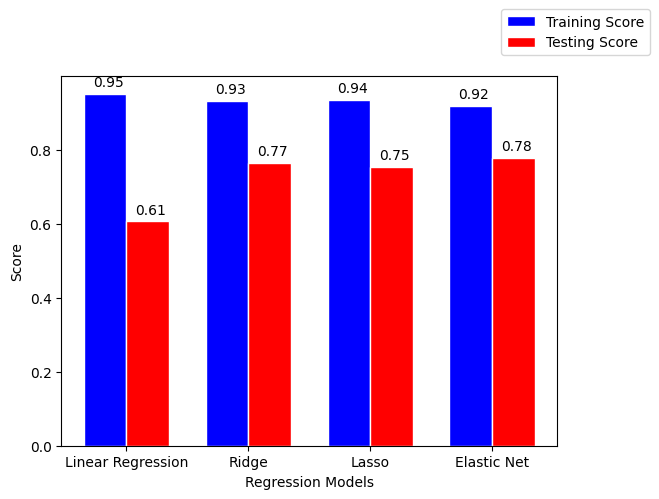

In [ ]:

# Define a list of models
models = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net']

# Define a list of training scores
training_scores = [lr_train_score, ridge_train_score,
                   lasso_train_score, elastic_train_score]

# Define a list of testing scores
testing_scores = [lr_test_score, ridge_test_score,
                  lasso_test_score, elastic_test_score]

# Set the width of the bars
barWidth = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(training_scores))
r2 = [x + barWidth for x in r1]

# Create the training score bar chart
plt.bar(r1, training_scores, color='blue', width=barWidth, edgecolor='white', label='Training Score')

# Create the testing score bar chart
plt.bar(r2, testing_scores, color='red', width=barWidth, edgecolor='white', label='Testing Score')

# Add xticks on the middle of the group bars
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.xticks([r + barWidth/2 for r in range(len(training_scores))], models)


# Add labels to the bars
for i, score in enumerate(training_scores):
    plt.text(i-0.1, score+0.02, str(round(score, 2)))
for i, score in enumerate(testing_scores):
    plt.text(i+0.25, score+0.02, str(round(score, 2)))

    
# Create legend and show the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.show()

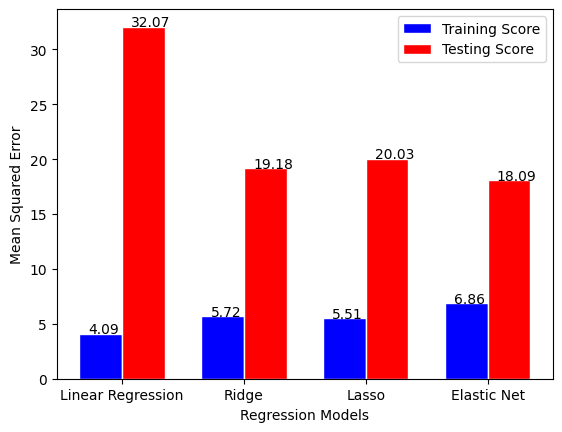

In [ ]:
# Define a list of models
models = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net']

# Define a list of training MSE scores
training_scores = [metrics.mean_squared_error(y_train, lr.predict(X_train)), 
                   metrics.mean_squared_error(y_train, ridge.predict(X_train)), 
                   metrics.mean_squared_error(y_train, lasso.predict(X_train)), 
                   metrics.mean_squared_error(y_train, elastic_net.predict(X_train))]

# Define a list of testing MSE scores
testing_scores = [metrics.mean_squared_error(y_test, lr.predict(X_test)), 
                  metrics.mean_squared_error(y_test, ridge.predict(X_test)), 
                  metrics.mean_squared_error(y_test, lasso.predict(X_test)), 
                  metrics.mean_squared_error(y_test, elastic_net.predict(X_test))]

# Set the width of the bars
barWidth = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(training_scores))
r2 = [x + barWidth for x in r1]

# Create the training score bar chart
plt.bar(r1, training_scores, color='blue', width=barWidth, edgecolor='white', label='Training Score')

# Create the testing score bar chart
plt.bar(r2, testing_scores, color='red', width=barWidth, edgecolor='white', label='Testing Score')

# Add xticks on the middle of the group bars
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.xticks([r + barWidth/2 for r in range(len(training_scores))], models)


# Add labels to the bars
for i, score in enumerate(training_scores):
    plt.text(i-0.1, score+0.02, str(round(score, 2)))
for i, score in enumerate(testing_scores):
    plt.text(i+0.25, score+0.02, str(round(score, 2)))

    
# Create legend and show the plot
plt.legend()
plt.show()

## 3.7.Conclusion

In this analysis, we explored various strategies to mitigate overfitting in linear machine learning models. We discussed the causes of overfitting and examined the applications of ridge, lasso, and elastic net regression techniques. To evaluate these methods, we applied them to the Boston housing dataset and assessed the outcomes.

Upon examining the first bar plot, we observed that while linear regression performed well on the training data, it did not yield accurate predictions on the testing set. This indicates that our model is overfitted and lacks generalizability to new data. To address this issue, we employed regularization techniques that can assist us in achieving better generalization. By utilizing different regularization algorithms and assessing performance metrics such as R-squared and MSE, we found that these techniques not only did these techniques have a minimal impact on the model's performance on the training data, but they also resulted in an improvement in its performance on the testing data. Consequently, we were able to alleviate the problem of overfitting and enhance the overall generalizability of our model.

# References


Ahsan, M., Mahmud, M. A., Saha, P. K., Gupta, K. D., & Siddique, Z. (2021). Effect of Data Scaling Methods on Machine Learning Algorithms and Model Performance. Technologies (Basel), 9(3), 52. https://doi.org/10.3390/technologies9030052